<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Momentum_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 33.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
# import necessary packages
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as reader
import datetime as dt
from pandas.tseries.offsets import MonthEnd

In [3]:
symbols=pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/nifty500/main/ind_nifty500list.csv')

In [4]:
symbols['data']=symbols.Symbol+'.NS'


In [5]:
ticker=symbols.data.tolist()

In [6]:
# Get ticker symbol for NSE 50 stocks
#symbols=pd.read_html('https://in.finance.yahoo.com/quote/%5ENSEI/components?p=%5ENSEI')[0]
#ticker=symbols.Symbol.to_list()


In [7]:
#symbols=pd.read_html('https://www.moneycontrol.com/financials/tatasteel/balance-sheetVI/TIS#TIS')

In [8]:
#symbols[0]

In [9]:
#Get the NSE Component prices
start_date = dt.datetime(2018,1,31)
end_date= dt.datetime(2021,12,11)
df =yf.download(ticker,start_date,end_date)['Adj Close']

[*********************100%***********************]  501 of 501 completed

1 Failed download:
- ORIENTREF.NS: No data found, symbol may be delisted


In [690]:
df.to_csv('data_500.csv')

In [10]:
# Get daily return and then cummulate it to monthly/Quartelry/Half yealrly /Annually return
monthly_return = df.pct_change().resample('M').agg(lambda x:(x+1).prod()-1)
#quarterly_return = df.pct_change().resample('Q').agg(lambda x:(x+1).prod()-1)
#halfyearly_return = df.pct_change().resample('H').agg(lambda x:(x+1).prod()-1)
#annual_return= df.pct_change().resample('Y').agg(lambda x:(x+1).prod()-1)


In [11]:
#Calculate returns over last 11 months to 6 months
past_11 = (monthly_return+1).rolling(11).apply(np.prod)-1
past_10 = (monthly_return+1).rolling(10).apply(np.prod)-1
past_9 = (monthly_return+1).rolling(9).apply(np.prod)-1
past_8 = (monthly_return+1).rolling(8).apply(np.prod)-1
past_7 = (monthly_return+1).rolling(7).apply(np.prod)-1
past_6 = (monthly_return+1).rolling(6).apply(np.prod)-1

In [12]:
#past_q_1= (quarterly_return+1).rolling(3).apply(np.prod)-1
#past_q_2= (quarterly_return+1).rolling(6).apply(np.prod)-1
#past_q_3= (quarterly_return+1).rolling(9).apply(np.prod)-1

In [652]:
formation=dt.datetime(2021,10,31)

In [653]:
from pandas.tseries.offsets import MonthEnd
end_measurement11= formation- MonthEnd(1)
end_measurement10 = formation-MonthEnd(2)

end_measurement09 = formation-MonthEnd(3)
end_measurement08 = formation-MonthEnd(4)
end_measurement07 = formation-MonthEnd(5)
end_measurement06 = formation-MonthEnd(6)

In [654]:
end_measurement11

Timestamp('2021-09-30 00:00:00')

In [655]:
past_11.tail(2)

,3MINDIA.NS,AARTIDRUGS.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ADANIENT.NS,ADANIGREEN.NS,ADANIPORTS.NS,ADANITRANS.NS,ADVENZYMES.NS,AEGISCHEM.NS,AFFLE.NS,AIAENG.NS,AJANTPHARM.NS,AKZOINDIA.NS,ALEMBICLTD.NS,ALKEM.NS,ALKYLAMINE.NS,ALOKINDS.NS,AMARAJABAT.NS,AMBER.NS,AMBUJACEM.NS,ANGELBRKG.NS,APLAPOLLO.NS,APLLTD.NS,APOLLOHOSP.NS,APOLLOTYRE.NS,ASAHIINDIA.NS,ASHOKA.NS,ASHOKLEY.NS,ASIANPAINT.NS,ASTERDM.NS,ASTRAL.NS,ASTRAZEN.NS,ATGL.NS,ATUL.NS,...,TRENT.NS,TRIDENT.NS,TRITURBINE.NS,TTKPRESTIG.NS,TV18BRDCST.NS,TVSMOTOR.NS,UBL.NS,UCOBANK.NS,UFLEX.NS,UJJIVAN.NS,UJJIVANSFB.NS,ULTRACEMCO.NS,UNIONBANK.NS,UPL.NS,UTIAMC.NS,VAIBHAVGBL.NS,VAKRANGEE.NS,VALIANTORG.NS,VARROC.NS,VBL.NS,VEDL.NS,VENKEYS.NS,VGUARD.NS,VINATIORGA.NS,VIPIND.NS,VMART.NS,VOLTAS.NS,VSTIND.NS,VTL.NS,WABCOINDIA.NS,WELCORP.NS,WELSPUNIND.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,WOCKPHARMA.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-30,0.201812,-0.281359,0.522199,0.660847,0.713492,0.221247,0.283529,0.540459,0.424116,2.469823,0.230667,0.423547,3.113143,-0.019455,-0.082506,0.518905,-0.034364,0.279290,-0.122354,-0.055428,0.240542,1.087818,-0.083691,-0.317478,0.287593,0.510700,2.291607,1.092865,-0.208193,1.358762,0.166132,0.750823,0.038316,0.266463,0.144128,0.157673,0.645264,-0.320409,3.260259,0.356834,...,0.476238,4.417585,1.315048,0.618932,0.333333,0.423581,0.268488,0.019685,0.307087,-0.509325,-0.536896,0.412597,0.362916,0.479562,1.010173,0.013332,-0.504088,-0.343253,-0.257549,0.464560,1.231798,0.433047,0.327173,0.563673,0.533882,0.552695,0.469277,-0.101047,0.922626,0.462904,0.288034,1.034020,0.201797,-0.221562,0.653547,-0.203092,-0.305322,0.472177,0.899905,-0.010993
2021-12-31,0.318146,-0.142263,0.688176,0.429069,0.642916,0.323797,0.537747,0.809793,0.454683,2.437393,0.382128,0.516732,3.073020,0.124618,-0.142491,0.486492,-0.041759,0.201203,-0.054338,0.108905,0.147009,0.687897,0.098824,-0.284304,0.266596,0.557421,2.248839,1.173385,-0.136623,1.049195,0.120557,0.803937,0.111556,0.165749,0.372172,0.226254,0.770056,-0.132930,3.790306,0.400254,...,0.667806,2.890961,1.224758,0.849662,0.776786,0.223760,0.228285,0.070039,0.521800,-0.425076,-0.453782,0.403493,0.568438,0.331351,0.831899,0.136414,-0.289955,-0.205213,-0.208428,0.492665,1.305403,0.720016,0.042055,0.558085,0.619223,0.484201,0.391213,-0.032173,0.932249,0.480956,0.587683,1.201532,0.257419,-0.246733,0.527279,-0.088244,-0.082540,0.710968,0.873493,0.031790


In [656]:
ret_12 = past_11.loc[end_measurement11]

In [657]:
ret_11 = past_10.loc[end_measurement10]
ret_10 = past_9.loc[end_measurement09]
ret_09 = past_8.loc[end_measurement08]
ret_08 = past_7.loc[end_measurement07]
ret_07 = past_6.loc[end_measurement06]


In [658]:
ret_12=ret_12.reset_index()
ret_11=ret_11.reset_index()
ret_10=ret_10.reset_index()
ret_09=ret_09.reset_index()
ret_08=ret_08.reset_index()
ret_07=ret_07.reset_index()

In [659]:
ret_12['quintile'] = pd.qcut(ret_12.iloc[:,1],10,labels=False)
ret_11['quintile'] = pd.qcut(ret_11.iloc[:,1],10,labels=False)
ret_10['quintile'] = pd.qcut(ret_10.iloc[:,1],10,labels=False)
ret_09['quintile'] = pd.qcut(ret_09.iloc[:,1],10,labels=False)
ret_08['quintile'] = pd.qcut(ret_08.iloc[:,1],10,labels=False)
ret_07['quintile'] = pd.qcut(ret_07.iloc[:,1],10,labels=False)

In [660]:
winners12= ret_12[ret_12.quintile==9]
winners11= ret_11[ret_11.quintile==9]
winners10= ret_10[ret_10.quintile==9]
winners9= ret_09[ret_09.quintile==9]
winners08= ret_08[ret_08.quintile==9]
winners07= ret_07[ret_07.quintile==9]

In [661]:
# Getting Common Winners

from functools import reduce # python 3 only
final_winner=reduce(np.intersect1d, [winners12.index,winners11.index,\
                                      winners10.index,winners9.index,\
                                      winners08.index,winners07.index])

final_winner=final_winner.tolist()

In [662]:
cols=[]
for ind in final_winner:
  print(df.columns[ind])
  cols.append(df.columns[ind])

ADANIENT.NS
ADANITRANS.NS
ALKYLAMINE.NS
ATGL.NS
BALAMINES.NS
DEEPAKNTR.NS
GRAPHITE.NS
HAPPSTMNDS.NS
HEG.NS
HINDCOPPER.NS
IIFL.NS
INTELLECT.NS
KPITTECH.NS
MMTC.NS
NATIONALUM.NS
PRINCEPIPE.NS
SAIL.NS
SUPPETRO.NS
TATAELXSI.NS
TATASTEEL.NS
VEDL.NS


In [697]:
(df['2020-03-30':'2020-03-30']['AAVAS.NS'][0]-df['2020-02-28':'2020-02-28']['AAVAS.NS'][0])/df['2020-02-28':'2020-02-28']['AAVAS.NS'][0]

-0.4031721584176865

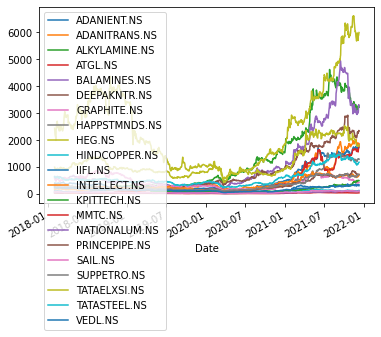

In [663]:
df[cols].plot();

In [664]:
features={'scripname':cols}
final_data=pd.DataFrame(features)

In [665]:
final_data['Date']=formation

In [666]:
final_data.to_csv('data.csv')

In [667]:
len(cols)

21

In [668]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [669]:
 imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [670]:
imp_mean.fit(df[cols])

SimpleImputer()

In [671]:
data_imputed=imp_mean.fit_transform(df[cols])

In [672]:
pca=PCA(1).fit(data_imputed.T)

In [673]:
index=pca.components_[0].T

In [674]:
final=pd.DataFrame({'Date':df.index,'Index_Value':index})

In [675]:
final=final.set_index('Date')

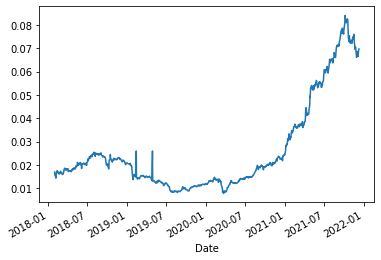

In [676]:
final['Index_Value'].plot();

In [677]:
stock_data=pd.DataFrame({'stockname':cols,'ROE':np.nan,'Debt_to_Equity':np.nan,'CFO':np.nan,'Earnings':np.nan})

In [678]:
stock_data.head(2)

,stockname,ROE,Debt_to_Equity,CFO,Earnings
0,ADANIENT.NS,NaN,NaN,NaN,NaN
1,ADANITRANS.NS,NaN,NaN,NaN,NaN
